# Explanatory data analysis

## About the dataset
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social, and school-related features, and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).

### Source
Paulo Cortez, University of Minho, Guimarães, Portugal, [http://www3.dsi.uminho.pt/pcortez](http://www3.dsi.uminho.pt/pcortez)

## Attributes
### Attributes for both Math and Portuguese language course datasets
1. **id** - unique record id matching one student (numeric)
2. **school** - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
3. **sex** - student's sex (binary: "F" - female or "M" - male)
4. **age** - student's age (numeric: from 15 to 22)
5. **address** - student's home address type (binary: "U" - urban or "R" - rural)
6. **famsize** - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
7. **Pstatus** - parent's cohabitation status (binary: "T" - living together or "A" - apart)
8. **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
10. **Mjob** - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. **Fjob** - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
12. **reason** - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
13. **guardian** - student's guardian (nominal: "mother", "father" or "other")
14. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
15. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
16. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
17. **schoolsup** - extra educational support (binary: yes or no)
18. **famsup** - family educational support (binary: yes or no)
19. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
20. **activities** - extra-curricular activities (binary: yes or no)
21. **nursery** - attended nursery school (binary: yes or no)
22. **higher** - wants to take higher education (binary: yes or no)
23. **internet** - Internet access at home (binary: yes or no)
24. **romantic** - with a romantic relationship (binary: yes or no)
25. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
26. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
27. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
28. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
30. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
31. **absences** - number of school absences (numeric: from 0 to 93)

### Grades (targets)
These grades are related to the course subject, Math or Portuguese:
- **G1** - first period grade (numeric: from 0 to 20)
- **G2** - second period grade (numeric: from 0 to 20)
- **G3** - final grade (numeric: from 0 to 20, output target)


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.axes import Axes
import seaborn as sns
from scipy.stats import normaltest, norm

## 1.0 Loading the Data
The first row and column were manually removed from the .xlsx file in order for the .read_excel function to load data properly

In [22]:
path = "../data/student_performance.xlsx"
portuguese_df = pd.read_excel(path, sheet_name="portuguese")
math_df = pd.read_excel(path, sheet_name="math")

## 2.1 Exploratory Data Analysys

In [23]:
portuguese_df["subject"] = "portuguese"
math_df["subject"] = "math"

# Combine the two
df = pd.concat([portuguese_df, math_df], ignore_index=True)

The data set has 714 observations and 34 features per observation

Firstly lets drop the id column since a unique record id doesn't provide us with any extra information and remove any duplicates

In [24]:
df = df.drop("id", axis=1)
df = df.drop_duplicates()
df.shape

(1044, 34)

Now our dataset contains 649 unique observations and 33 features

Next we will look at the missing values of the dataset

In [25]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

age            8
address        3
famsize        7
Pstatus       10
Medu          10
Fedu           9
Mjob           4
Fjob           6
reason         9
guardian       6
traveltime     5
studytime      6
failures       7
schoolsup      5
famsup         5
paid           7
activities    13
nursery       10
higher         5
internet       8
romantic      10
famrel         7
freetime       1
goout          9
Dalc          14
Walc           4
health         5
absences       7
dtype: int64

We can see that quite a few columns have missing values, on the other hand there are not a lot of them ~1% at most per column, we will deal with these missing values later on 

Next we can look at the types

In [26]:
df.dtypes

school         object
sex            object
age           float64
address        object
famsize        object
Pstatus        object
Medu          float64
Fedu          float64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
studytime     float64
failures      float64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime      float64
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1              int64
G2              int64
G3              int64
subject        object
dtype: object

We will firstly explore the **categorical columns** - those which have a dtype of 'object'  
We are going to list them out along with their unique values in order to later decide how can we transform them to fit our models needs

In [27]:
categorical_columns = df.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    # Omit the NaN values
    print(f"{col}: {df[df[col].notnull()][col].unique()}") 

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['services' 'teacher' 'at_home' 'other' 'health']
Fjob: ['services' 'other' 'health' 'teacher' 'at_home']
reason: ['reputation' 'other' 'course' 'home']
guardian: ['mother' 'father' 'other']
schoolsup: ['no' 'yes' 'não' '0' 'sim']
famsup: ['yes' 'no' 'não' '1' 'sim' '0']
paid: ['no' '0' 'yes' 'não' 'sim' '1']
activities: ['yes' 'no' 'não' '1' '0' 'sim']
nursery: ['yes' 'no' 'não' 'sim' '1' '0']
higher: ['yes' 'no' '1' 'sim' 'não']
internet: ['yes' 'no' 'sim' '1' '0' 'não']
romantic: ['no' 'yes' '0' 'não' 'sim' '1']
subject: ['portuguese' 'math']


Some of the "binary" columns seem to be inconsistent - they contain english/portugese words corresponding to true and false along with 0's and 1's
There are other columns, which only take 2 unique values that can be interpreted as "binary"  
And finally several that take more than 2 unqiue values, we will discuss how to represent these in the preprocessing step

For the sake of visualizations, we will fix the inconsistent columns

In [28]:
transformation_dict = {
    "yes": "yes", "1": "yes", "sim": "yes",
    "no": "no", "0": "no", "não": "no"
}

inconsistent_columns = ["schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
df[inconsistent_columns] = df[inconsistent_columns].apply(lambda col: col.map(transformation_dict))

Now we can visualize these columns, starting with those which have only two unique values

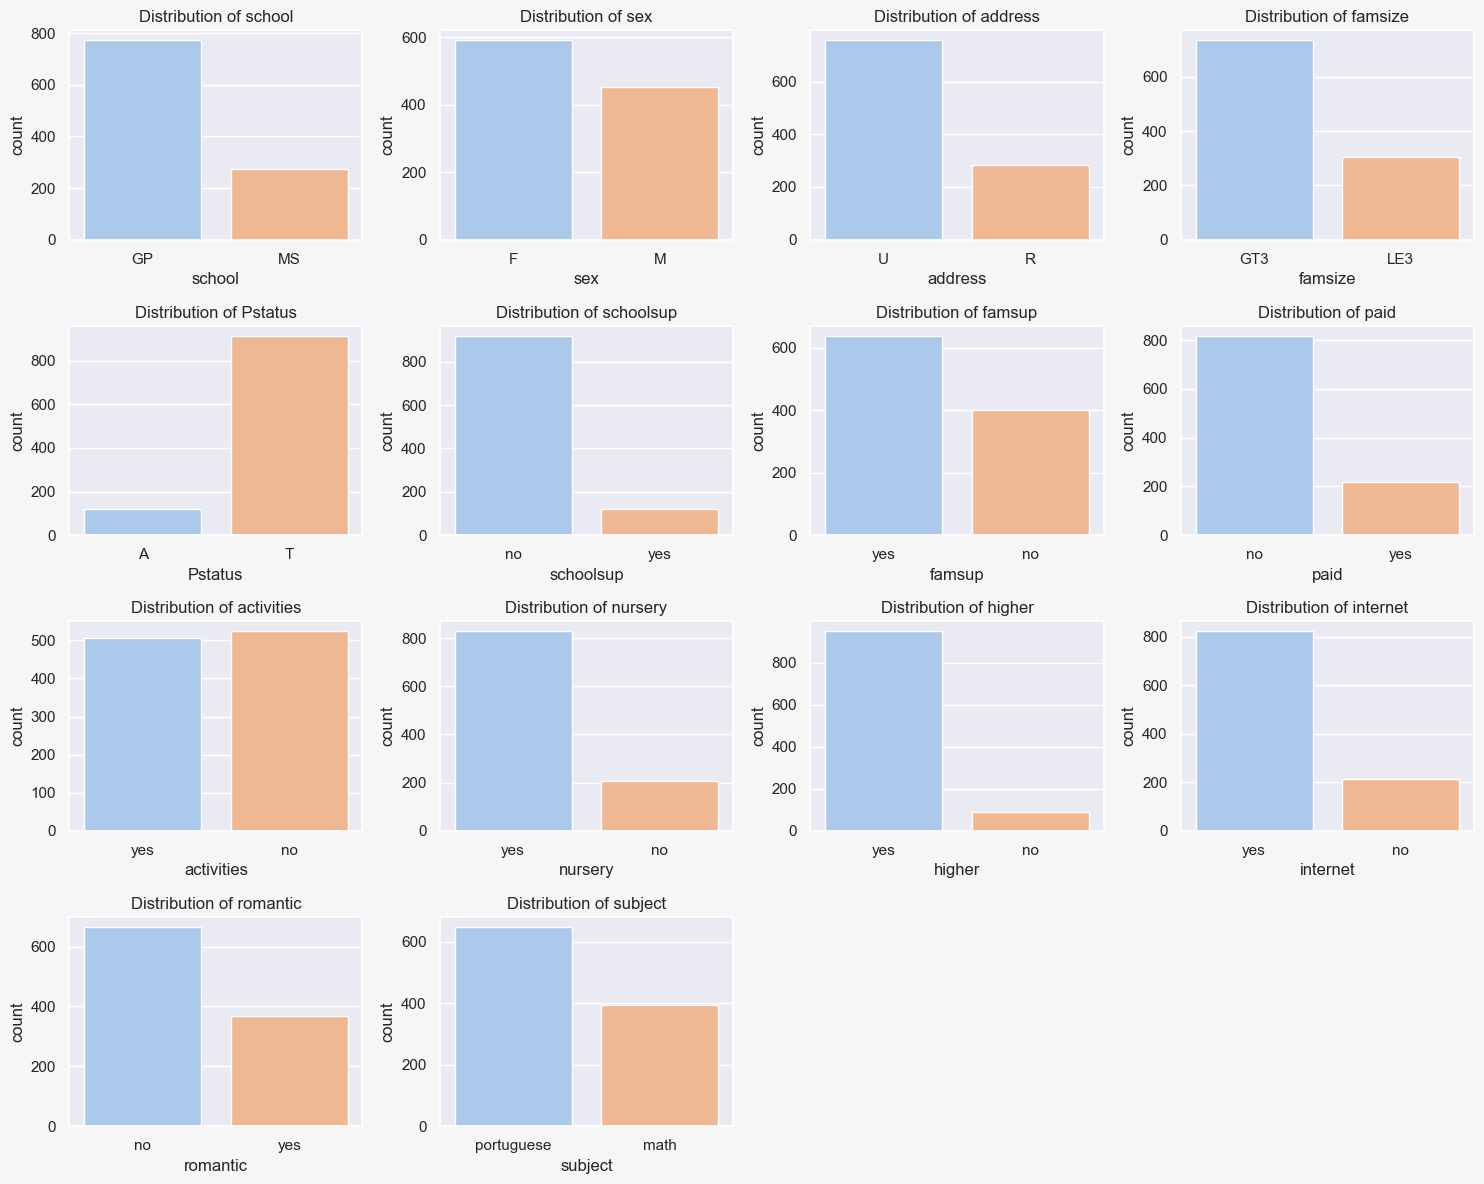

In [29]:
sns.set()
sns.set_palette("pastel")
index = 1

plt.figure(figsize=(15, 12), facecolor='#f6f6f6')
for col in df[categorical_columns]:
    column = df[df[col].notnull()][col]
    if len(column.unique()) == 2:
        plt.subplot(4, 4, index)
        sns.countplot(data=df, x=col, legend=False, hue=col)
        plt.title(f"Distribution of {col}")
        
        index += 1

plt.tight_layout()
plt.show()

We can see that some of the columns such as 'activities' are balanced and other like 'Pstatus', 'higher' ... are tipped to one side

Lets also visualize the categorical columns, which have more than 2 unique values

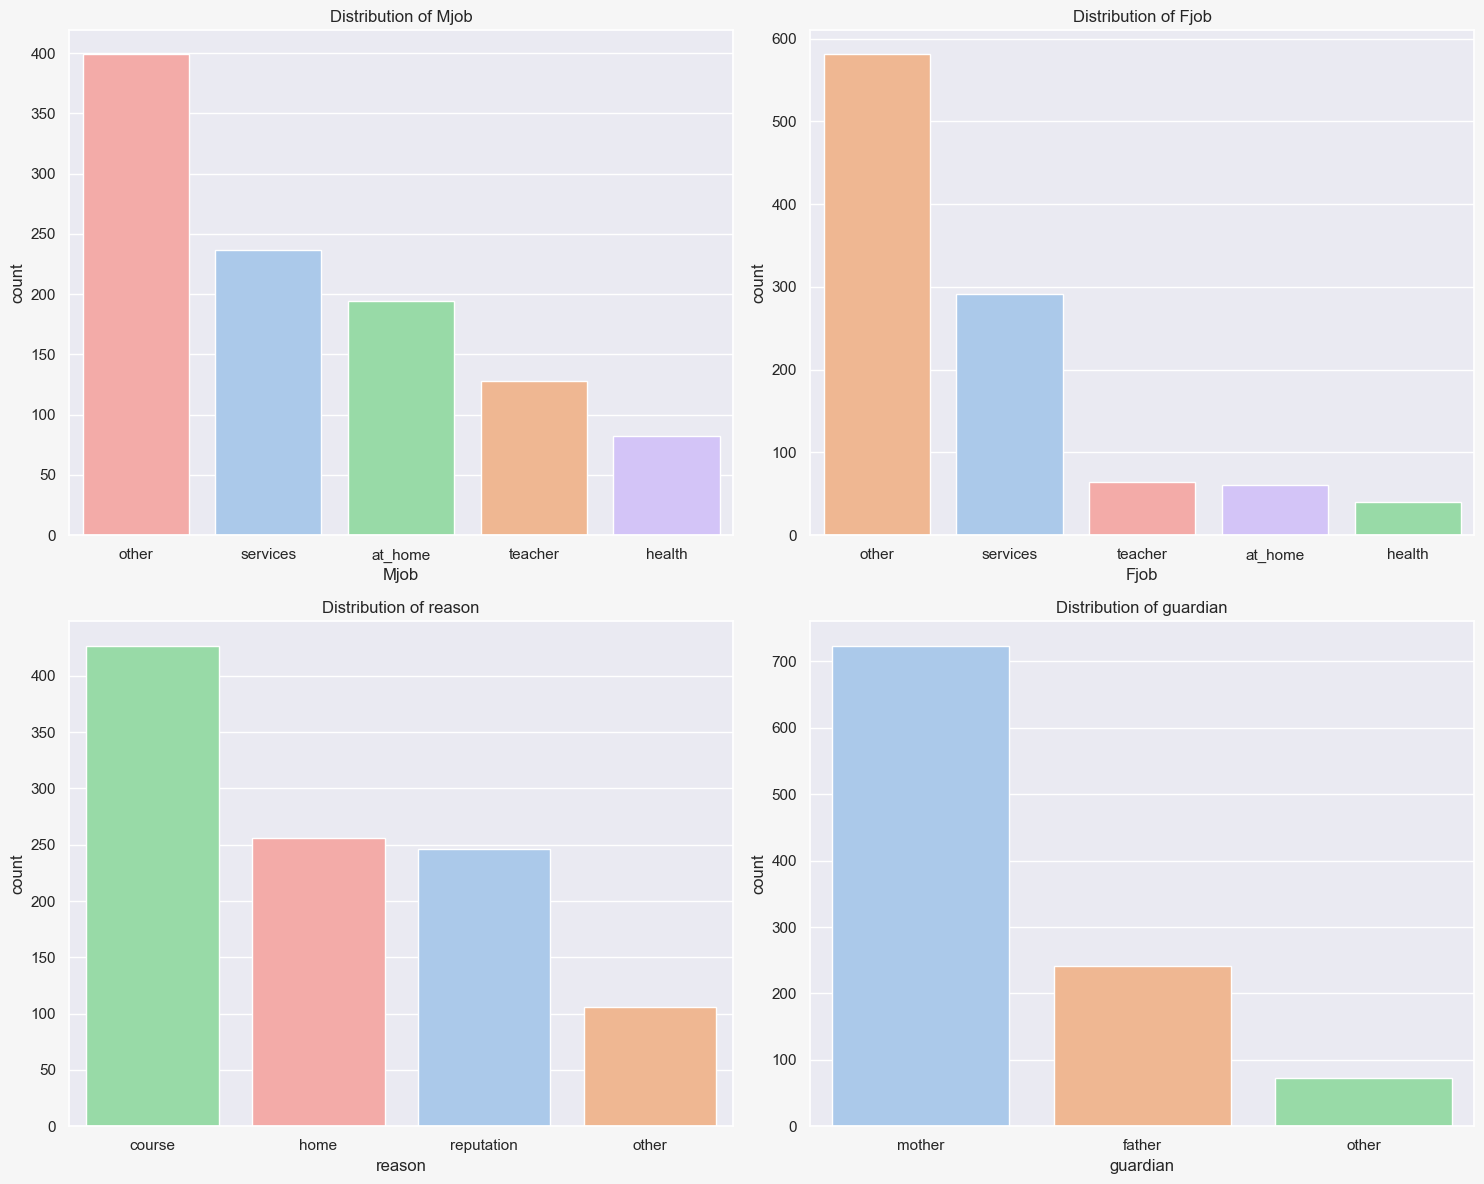

In [30]:
index = 1

plt.figure(figsize=(15, 12), facecolor='#f6f6f6')
for col in df[categorical_columns]:
    column = df[df[col].notnull()][col]
    if len(column.unique()) > 2:
        order = column.value_counts().index
        plt.subplot(2, 2, index)
        sns.countplot(data=df, x=col, legend=False, order=order, hue=col)
        plt.title(f"Distribution of {col}")
        
        index += 1

plt.tight_layout()
plt.show()

Here are some interesting insights:
- The majority of the students' mothers are either staying at home or working in service jobs.
- Most of the students' fathers work in service jobs.
- The primary reason for choosing a particular school is course preference.
- The student's guardian is most commonly his mother.

Next, we will take a closer look at **numeric columns**, starting with a basic summary  
We won't consider the id column, since it has no information value for us

In [31]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
target_columns = ["G1", "G2","G3"]
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1036.0,16.726834,1.241666,15.0,16.0,17.0,18.0,22.0
Medu,1034.0,2.596712,1.123036,0.0,2.0,3.0,4.0,4.0
Fedu,1035.0,2.392271,1.101581,0.0,1.0,2.0,3.0,4.0
traveltime,1039.0,1.524543,0.732618,1.0,1.0,1.0,2.0,4.0
studytime,1038.0,1.972062,0.834519,1.0,1.0,2.0,2.0,4.0
failures,1037.0,0.265188,0.657650,0.0,0.0,0.0,0.0,3.0
famrel,1037.0,3.936355,0.930914,1.0,4.0,4.0,5.0,5.0
freetime,1043.0,3.201342,1.031983,1.0,3.0,3.0,4.0,5.0
goout,1035.0,3.158454,1.155264,1.0,2.0,3.0,4.0,5.0
Dalc,1030.0,1.488350,0.905313,1.0,1.0,1.0,2.0,5.0


Some interesting obervations are
- Failures varianble is highly imbalanced with most students having 0 failures
- Target variables G1, G2 and G2 exhibit similar values

We can also look at the distributions

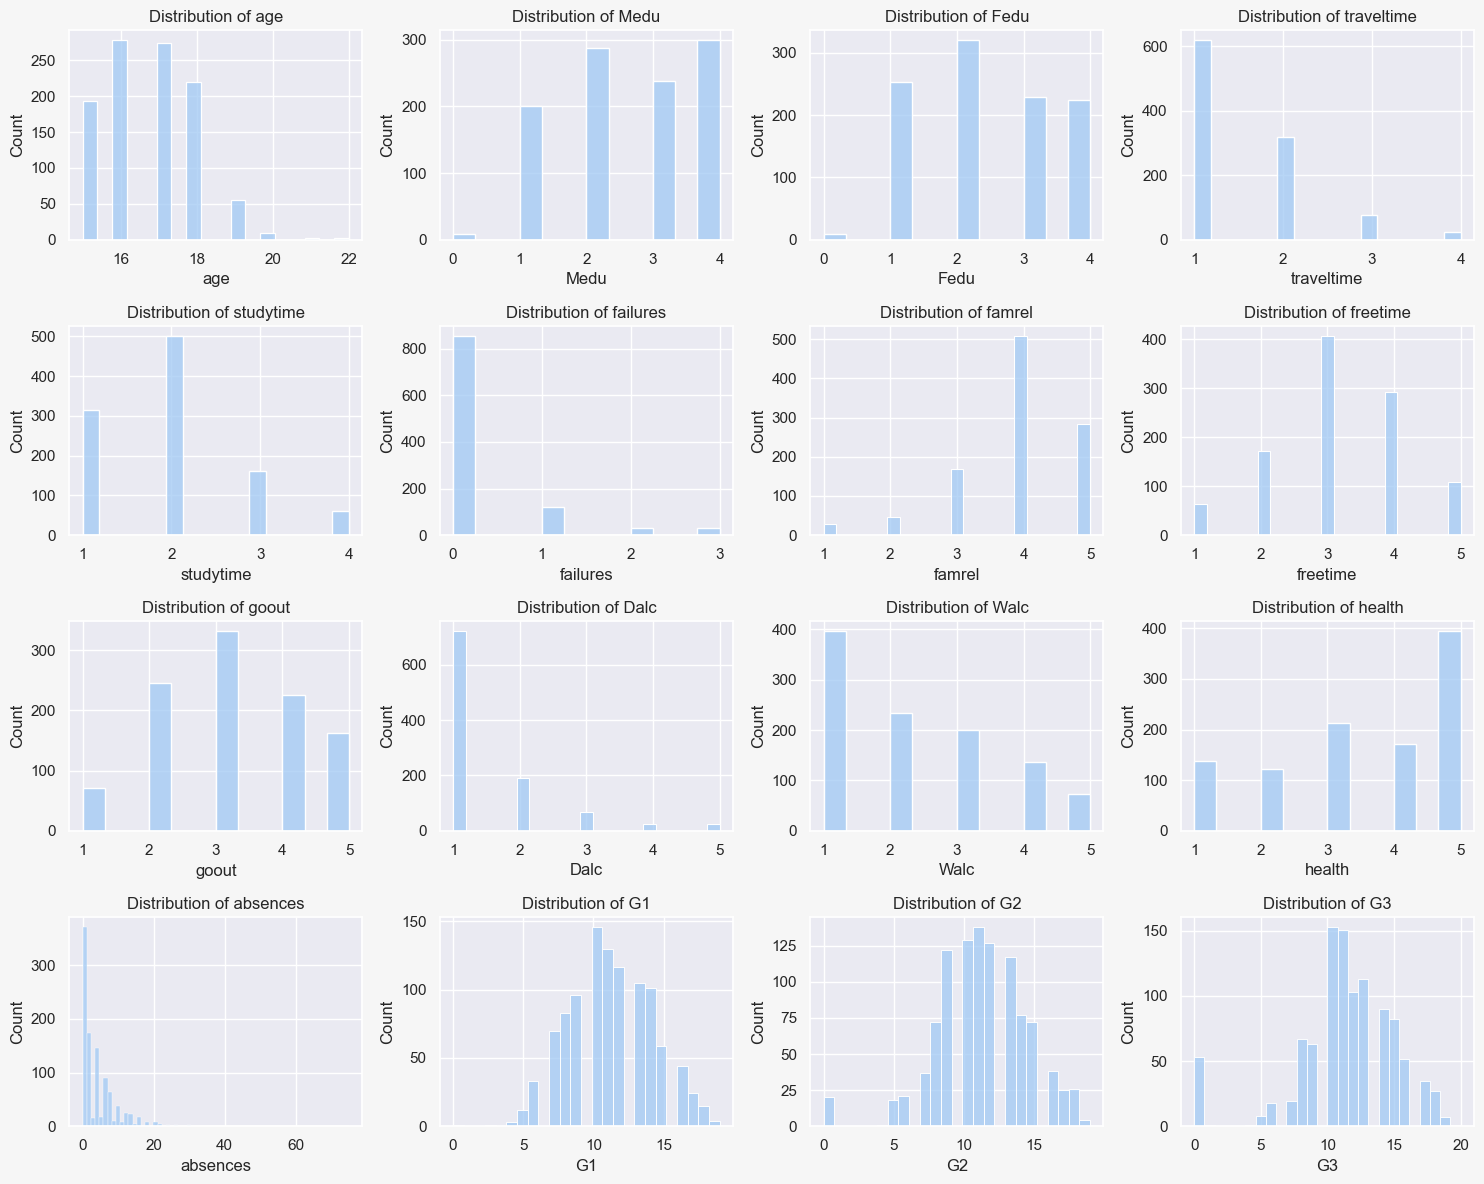

In [32]:
plt.figure(figsize=(15, 12), facecolor='#f6f6f6')

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

Target variables G1, G2 and G3 seem to follow a Gaussian distribution, we can verify this by observing QQ plot and then using `normaltest`

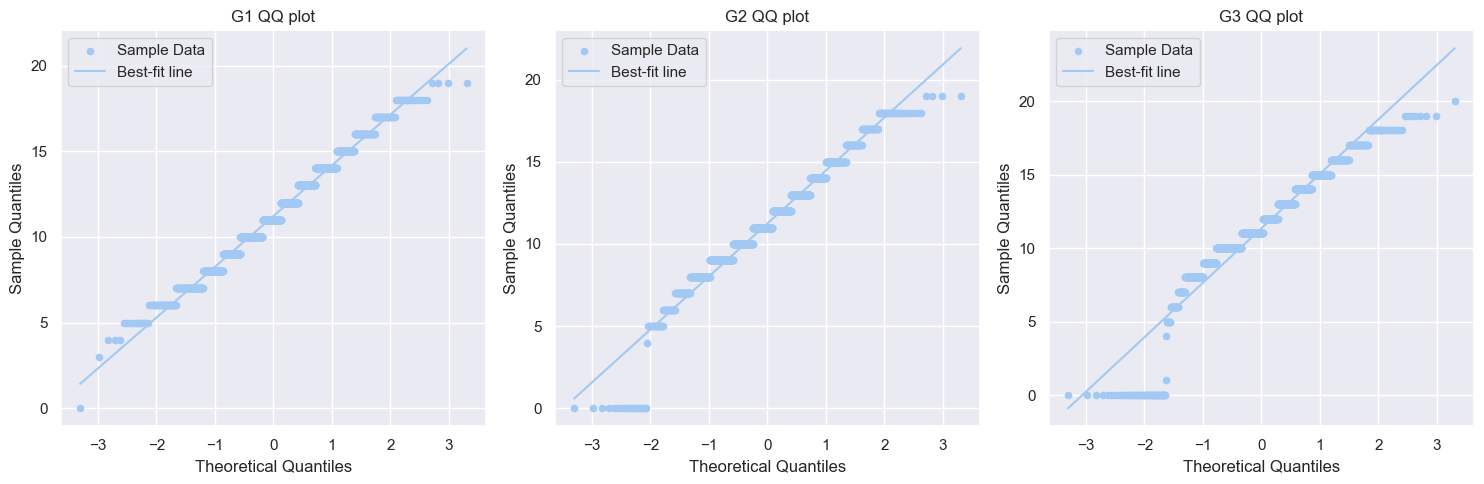

In [33]:
# Unfortunately QQ plot is not available in seaborn,
# so we will use matplotlib to create the QQ plot,
# which makes this code a bit longer.

def qq_plot(data: np.ndarray, ax: Axes, title: str) -> Axes:
    sorted_data = np.sort(data)
    n = len(sorted_data)

    p = (np.arange(1, n + 1) - 0.5) / n
    theoretical_quants = norm.ppf(p)

    ax.scatter(theoretical_quants, sorted_data, label='Sample Data', s=20)

    slope, intercept = np.polyfit(theoretical_quants, sorted_data, 1)
    line_x = np.array([theoretical_quants[0], theoretical_quants[-1]])
    line_y = slope * line_x + intercept
    ax.plot(line_x, line_y, label='Best-fit line')

    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Sample Quantiles")
    ax.set_title(title)
    ax.legend()

    return ax

n_plots = 3
fig, axes = plt.subplots(nrows=1, ncols=n_plots, figsize=(5 * n_plots, 5))

qq_plot(df['G1'], ax=axes[0], title='G1 QQ plot')
qq_plot(df['G2'], ax=axes[1], title='G2 QQ plot')
qq_plot(df['G3'], ax=axes[2], title='G3 QQ plot')

plt.tight_layout()
plt.show()


From the QQ plots, it seems that G1 fits normal distribution quantiles perfectly, G2 a bit less and G3 does not as much. We can make this more formal using `normaltest`

In [34]:
_, p1 = normaltest(df["G1"])
_, p2 = normaltest(df["G2"])
_, p3 = normaltest(df["G3"])

print("G1 p-value:", p1)
print("G2 p-value:", p2)
print("G3 p-value:", p3)

G1 p-value: 0.022476359561975277
G2 p-value: 4.324525038267362e-16
G3 p-value: 5.893830316490009e-37


So in fact, we see that for G1 it is possible that samples come from normal distribution, but for G2 and G3 we have to reject this hypothesis.

Back to all of the distributions - we can also visualize the distributions using boxplots, to allow us to have more insight into the existence of outliers:

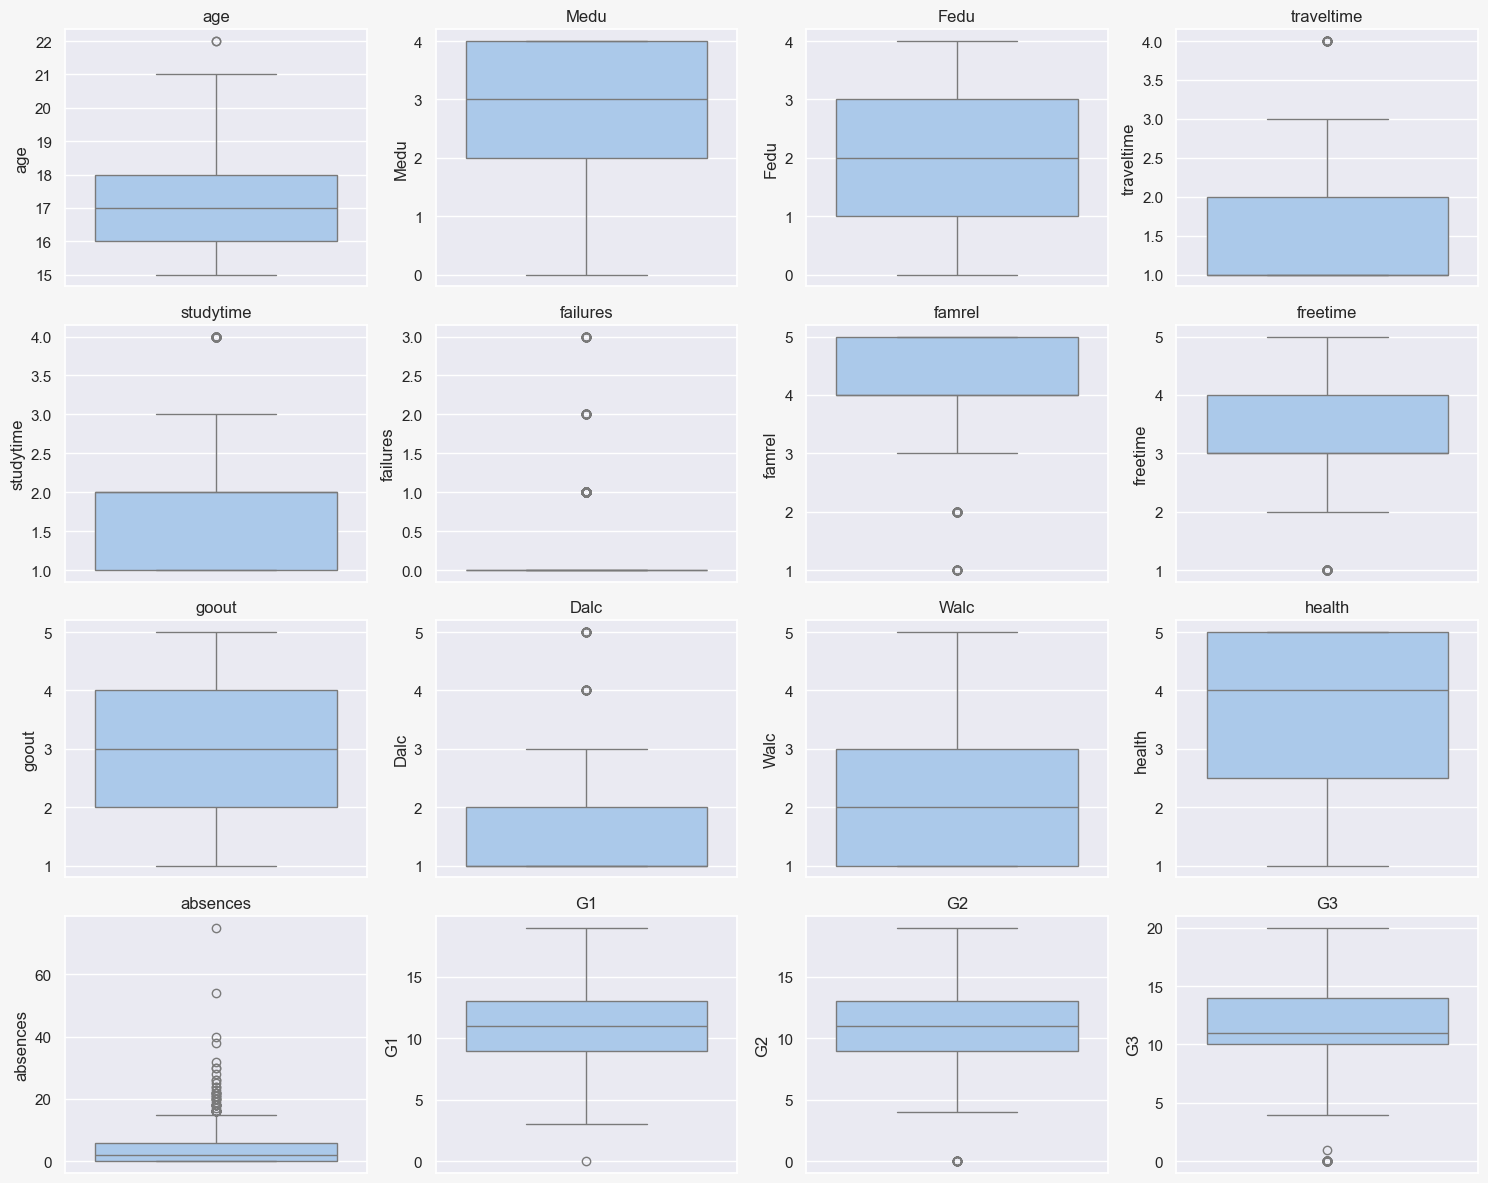

In [35]:
plt.figure(figsize=(15, 12), facecolor='#f6f6f6')

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"{col}")
    
plt.tight_layout()
plt.show()

We can see a number of outliers in each of the boxplots. For `Medu`, `Fedu`, `health`, `Walc` and `goout` do not indicate any outliers. We do not need to do anything.
For `traveltime`, `studytime`, `famrel` and `Dalc` there are some outliers, but since all of the data are on 1-5 scale there is no need removing it.
The graph for `failures` again seems interesting, as everything except `0` failures is marked as outlier, but this is also expected, given the nature of the data.
Outliers in `G1`-`G3` are also meaningful for us, given that we are trying to  predict the final grades. So only thing where we have to focus in preprocessing is the `absences`,
as they seem to exhibit a larger number of outliers.

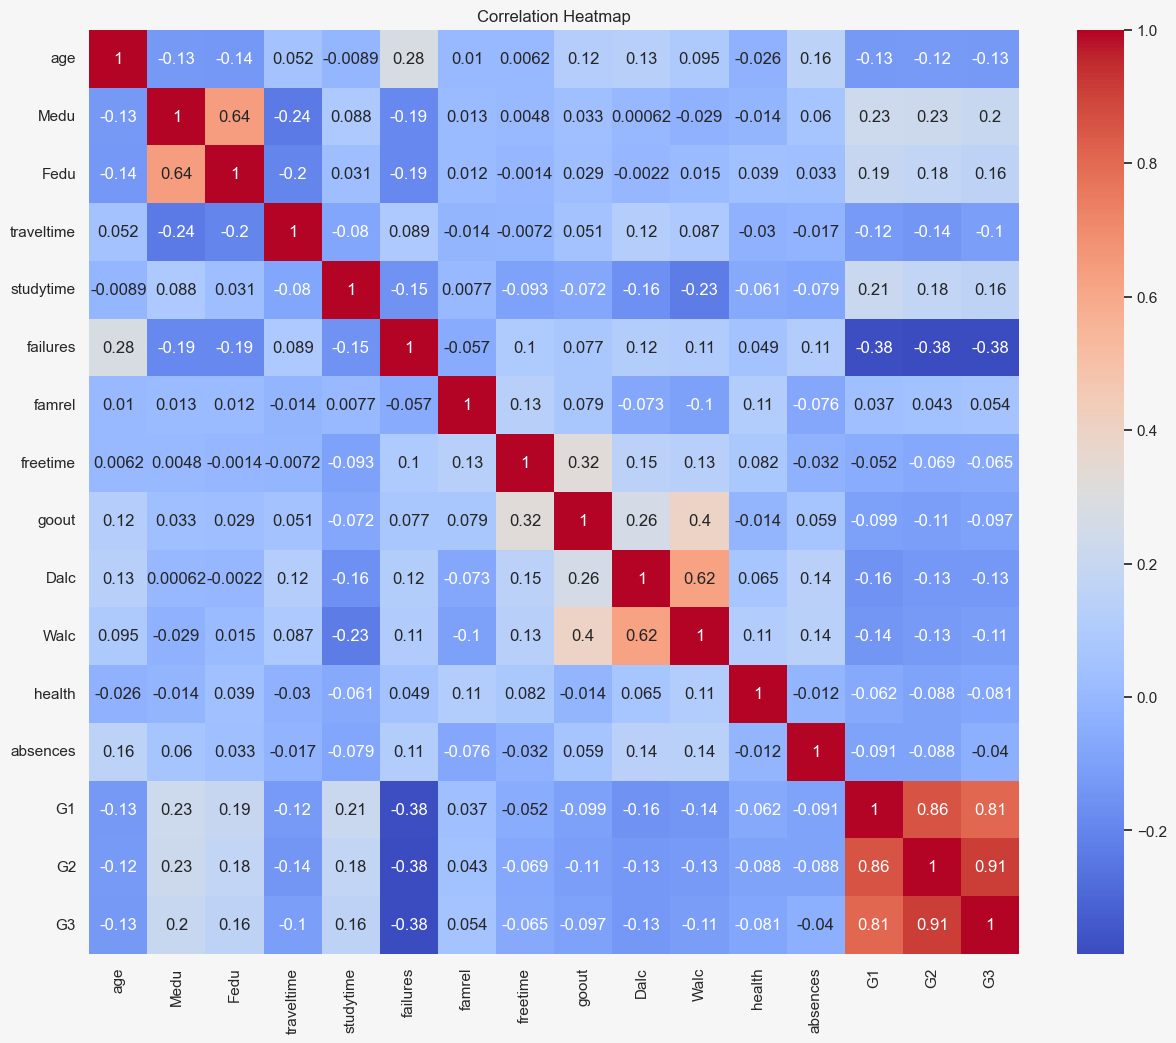

In [36]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(15, 12), facecolor='#f6f6f6')
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Target variables G1, G2 and G3 have a strong positive correlation  
Variables describing the workday and weekend alcohol consumption also exhibit a positive correlation, this also applies to father's and mother's education

The strongest negative correlation is between the grades and the number of failures, meaning that people who fail are more likely to get a worst grade